<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 1*

# Recurrent Neural Networks and Long Short Term Memory (LSTM)

![Monkey at a typewriter](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Chimpanzee_seated_at_typewriter.jpg/603px-Chimpanzee_seated_at_typewriter.jpg)

It is said that [infinite monkeys typing for an infinite amount of time](https://en.wikipedia.org/wiki/Infinite_monkey_theorem) will eventually type, among other things, the complete works of Wiliam Shakespeare. Let's see if we can get there a bit faster, with the power of Recurrent Neural Networks and LSTM.

This text file contains the complete works of Shakespeare: https://www.gutenberg.org/files/100/100-0.txt

Use it as training data for an RNN - you can keep it simple and train character level, and that is suggested as an initial approach.

Then, use that trained RNN to generate Shakespearean-ish text. Your goal - a function that can take, as an argument, the size of text (e.g. number of characters or lines) to generate, and returns generated text of that size.

Note - Shakespeare wrote an awful lot. It's OK, especially initially, to sample/use smaller data and parameters, so you can have a tighter feedback loop when you're trying to get things running. Then, once you've got a proof of concept - start pushing it more!

In [93]:
import requests
import pandas as pd



In [95]:
url = "https://www.gutenberg.org/files/100/100-0.txt"

r = requests.get(url)
r.encoding = r.apparent_encoding
data = r.text
data = data.split('\r\n')
toc = [l.strip() for l in data[44:130:2]]
# Skip the Table of Contents
data = data[135:]

# Fixing Titles
toc[9] = 'THE LIFE OF KING HENRY V'
toc[18] = 'MACBETH'
toc[24] = 'OTHELLO, THE MOOR OF VENICE'
toc[34] = 'TWELFTH NIGHT: OR, WHAT YOU WILL'

locations = {id_:{'title':title, 'start':-99} for id_,title in enumerate(toc)}

# Start 
for e,i in enumerate(data):
    for t,title in enumerate(toc):
        if title in i:
            locations[t].update({'start':e})
            

df_toc = pd.DataFrame.from_dict(locations, orient='index')
df_toc['end'] = df_toc['start'].shift(-1).apply(lambda x: x-1)
df_toc.loc[42, 'end'] = len(data)
df_toc['end'] = df_toc['end'].astype('int')

df_toc['text'] = df_toc.apply(lambda x: '\r\n'.join(data[ x['start'] : int(x['end']) ]), axis=1)

In [96]:
#Shakespeare Data Parsed by Play
df_toc.head()

,title,start,end,text
0,THE TRAGEDY OF ANTONY AND CLEOPATRA,-99,14379,
1,AS YOU LIKE IT,14380,17171,AS YOU LIKE IT\r\n\r\n\r\nDRAMATIS PERSONAE.\r...
2,THE COMEDY OF ERRORS,17172,20372,THE COMEDY OF ERRORS\r\n\r\n\r\n\r\nContents\r...
3,THE TRAGEDY OF CORIOLANUS,20373,30346,THE TRAGEDY OF CORIOLANUS\r\n\r\nDramatis Pers...
4,CYMBELINE,30347,30364,CYMBELINE.\r\nLaud we the gods;\r\nAnd let our...


In [97]:
import tensorflow as tf

df_toc.dtypes


title    object
start     int64
end       int64
text     object
dtype: object

In [98]:
len(df_toc)

43

In [99]:
X = df_toc['title']
y = df_toc['text']
print(X.shape)
print(y.shape)

(43,)
(43,)


In [100]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [102]:
from __future__ import print_function

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This is our perceptron from Monday's by-hand: 
model = Sequential()
model.add(Dense(units=323, activation='relu', input_dim=784, name='input_dense_32'))
model.add(Dense(units=323, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [104]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_dense_32 (Dense)       (None, 323)               253555    
_________________________________________________________________
dense_16 (Dense)             (None, 323)               104652    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                3240      
Total params: 361,447
Trainable params: 361,447
Non-trainable params: 0
_________________________________________________________________


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


print(X.shape, y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = RandomForestClassifier(random_state=2)


(43,) (43,)
(34,) (9,) (34,) (9,)


In [114]:
X_train

27             THE TRAGEDY OF ROMEO AND JULIET
5     THE TRAGEDY OF HAMLET, PRINCE OF DENMARK
2                         THE COMEDY OF ERRORS
30                 THE LIFE OF TIMON OF ATHENS
26                      KING RICHARD THE THIRD
3                    THE TRAGEDY OF CORIOLANUS
38                      THE PASSIONATE PILGRIM
41                            VENUS AND ADONIS
40                         THE RAPE OF LUCRECE
16                        LOVE’S LABOUR’S LOST
34            TWELFTH NIGHT: OR, WHAT YOU WILL
21                   A MIDSUMMER NIGHT’S DREAM
15                    THE TRAGEDY OF KING LEAR
7     THE SECOND PART OF KING HENRY THE FOURTH
6      THE FIRST PART OF KING HENRY THE FOURTH
10     THE SECOND PART OF KING HENRY THE SIXTH
11      THE THIRD PART OF KING HENRY THE SIXTH
33            TWELFTH NIGHT; OR, WHAT YOU WILL
12                       KING HENRY THE EIGHTH
22                      MUCH ADO ABOUT NOTHING
4                                    CYMBELINE
23      THE T

In [118]:
# Concatonate test and training datasets
allreviews = np.concatenate((X_train, X_test), axis=0)

# Review lengths across test and training whole datasets
print("Maximum review length: {}".format(len(max((allreviews), key=len))))
print("Minimum review length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

# Print a review and it's class as stored in the dataset. Replace the number
# to select a different review.
print("")
print("Machine readable Review")
print("  Review Text: " + str(X_train[30]))
print("  Review Sentiment: " + str(y_train[30]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Review")
print("  Review Text: " + decode_review(X_train[10]))
#print("  Review Sentiment: " + class_names[y_train[10]])

Maximum review length: 40
Minimum review length: 0
Mean review length: 24.488372093023255

Machine readable Review
  Review Text: THE LIFE OF TIMON OF ATHENS
  Review Sentiment: THE LIFE OF TIMON OF ATHENS

DRAMATIS PERSONAE

    TIMON of Athens

    LUCIUS
    LUCULLUS
    SEMPRONIUS
       flattering lords

    VENTIDIUS, one of Timon's false friends
    ALCIBIADES, an Athenian captain
    APEMANTUS, a churlish philosopher
    FLAVIUS, steward to Timon

    FLAMINIUS
    LUCILIUS
    SERVILIUS
       Timon's servants

    CAPHIS
    PHILOTUS
    TITUS
    HORTENSIUS
       servants to Timon's creditors

    POET PAINTER JEWELLER MERCHANT MERCER AN OLD ATHENIAN THREE
    STRANGERS A PAGE A FOOL

    PHRYNIA
    TIMANDRA
       mistresses to Alcibiades

    CUPID
    AMAZONS
      in the Masque

    Lords, Senators, Officers, Soldiers, Servants, Thieves, and
      Attendants

SCENE: Athens and the neighbouring woods

ACT I. SCENE I. Athens. TIMON'S house

Enter POET, PAINTER, JEWELLER,

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found to put in legend.


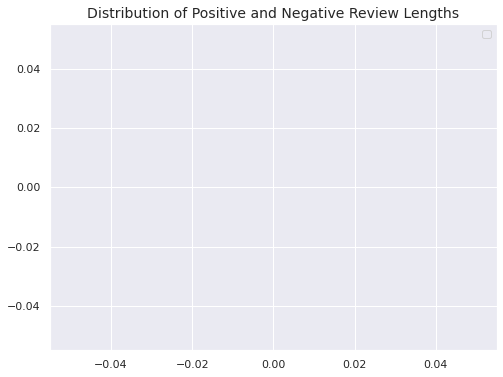

In [119]:
# Get the lengths for positive and negative reviews
all_labels = np.concatenate([y_train, y_test])
positive = np.array(result)[all_labels==1]
negative = np.array(result)[all_labels==0]

plt.figure(figsize=(8,6))
sns.distplot(positive, label='Positive Reviews', hist=False)
sns.distplot(negative, label='Negative Reviews', hist=False)
plt.title('Distribution of Positive and Negative Review Lengths', fontsize=14)
plt.legend();

In [120]:
# If you want to pad the end of the sequences you can set padding='post'.
maxlen = 250

print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (25000, 250)
x_test shape:  (25000, 250)


In [121]:
x_train[60]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [130]:
mlp = Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learned during the training process.
mlp.add(Embedding(max_features, 64, input_length=maxlen))

# Dense layer with 128 neurons and relu activation
mlp.add(Dense(128, activation='sigmoid'))

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
mlp.add(Dropout(0.25))

# Final layer is dense single node. A sigmoid activation function determines 
# the output from this node - a value between 0 and 1. Closer to 0 indicates 
# a negative review. Closer to 1 indicates a positive review.
mlp.add(Dense(1, activation='sigmoid'))

# Compile the model
mlp.compile(loss='binary_crossentropy',
            optimizer='adam', 
            metrics=['accuracy'])

mlp.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 64)           1280000   
_________________________________________________________________
dense_21 (Dense)             (None, 250, 128)          8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 250, 128)          0         
_________________________________________________________________
dense_22 (Dense)             (None, 250, 1)            129       
Total params: 1,288,449
Trainable params: 1,288,449
Non-trainable params: 0
_________________________________________________________________


In [133]:
rnn = Sequential()
rnn.add(Embedding(max_features, 64, input_length=maxlen))
rnn.add(SimpleRNN(100))
rnn.add(Dropout(0.25))
rnn.add(Dense(1, activation='sigmoid'))

rnn.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

rnn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 64)           1280000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               16500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 1,296,601
Trainable params: 1,296,601
Non-trainable params: 0
_________________________________________________________________


In [139]:
lstm = Sequential()
lstm.add(Embedding(max_features, 128))

# We are using a fast version of LSTM whih is optimised for GPUs. This layer 
# looks at the sequence of words in the review, along with their word embeddings
# and uses both of these to determine to sentiment of a given review.

# If you wanted to stack multiple LSTM layers:
# model.add(LSTM(256, return_sequences=True))
# model.add(LSTM(128))

# If you wanted to add Bidirectional LSTM:
# lstm.add(Bidirectional(LSTM(128)))

# Note for training on GPU:
# In TensorFlow 2.0, the built-in LSTM and GRU layers have been updated to leverage CuDNN kernels by default when a GPU is available. 
# With this change, the prior keras.layers.CuDNNLSTM/CuDNNGRU layers have been deprecated, and you can build your model without worrying 
# about the hardware it will run on.

# Since the CuDNN kernel is built with certain assumptions, this means the layer will not be able to use the CuDNN kernel if you change the 
# defaults of the built-in LSTM or GRU layers. E.g.:
#   - Changing the activation function from tanh to something else.
#   - Changing the recurrent_activation function from sigmoid to something else.
#   - Using recurrent_dropout > 0.
lstm.add(LSTM(128))
lstm.add(Dropout(0.25))
lstm.add(Dense(1, activation='sigmoid'))

lstm.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

lstm.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


# Resources and Stretch Goals

## Stretch goals:
- Refine the training and generation of text to be able to ask for different genres/styles of Shakespearean text (e.g. plays versus sonnets)
- Train a classification model that takes text and returns which work of Shakespeare it is most likely to be from
- Make it more performant! Many possible routes here - lean on Keras, optimize the code, and/or use more resources (AWS, etc.)
- Revisit the news example from class, and improve it - use categories or tags to refine the model/generation, or train a news classifier
- Run on bigger, better data

## Resources:
- [The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) - a seminal writeup demonstrating a simple but effective character-level NLP RNN
- [Simple NumPy implementation of RNN](https://github.com/JY-Yoon/RNN-Implementation-using-NumPy/blob/master/RNN%20Implementation%20using%20NumPy.ipynb) - Python 3 version of the code from "Unreasonable Effectiveness"
- [TensorFlow RNN Tutorial](https://github.com/tensorflow/models/tree/master/tutorials/rnn) - code for training a RNN on the Penn Tree Bank language dataset
- [4 part tutorial on RNN](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/) - relates RNN to the vanishing gradient problem, and provides example implementation
- [RNN training tips and tricks](https://github.com/karpathy/char-rnn#tips-and-tricks) - some rules of thumb for parameterizing and training your RNN